In [17]:
import numpy as np
import matplotlib.pyplot as plt
rndm = np.random.RandomState(1234)
x_n1 = np.ones(len(b))
def minresidual(A, b, x_n1, eps = 1e-3, maxiter = 500): #реализуем курсеровский метод
    x0 = np.linalg.inv(A) @ b
    i = 0
    x_n = np.zeros(len(A))
    tau = 0 
    
    while np.abs(np.linalg.norm(x_n - x_n1)) > eps and i < maxiter:
        tau0 = tau
        i += 1
        j.append(i)
        x_n = x_n1.copy()
        r_n = A @ x_n - b #вычисляем остаток, основываясь на предидущей итерации
        tau = (r_n @ (A @ r_n))/np.linalg.norm(A @ r_n)**2 #вычисляем тау для минимизации r_n1
        x_n1 = x_n - tau * r_n #вычисляем новый икс
        #Сделаем то, что просят в задании:  
        dx.append(np.linalg.norm(x_n1 - x0))#изучим сходимость к решению с точки зрения отклонения от основного истинного решения 
        dr.append(np.linalg.norm(r_n))#изучим сходимость к решению с точки зрения нормы невязки и отклонения от основного истинного решения (которое можно получить, используя прямой метод)
        dtau.append(np.linalg.norm(tau0 - tau))# посмотрим как меняется тау в процессе итераций 
    plt.figure()
    plt.xlabel('Итерация')
    plt.ylabel('Отклонение dx')    
    plt.plot(j, dx) 
    
    plt.figure()
    plt.plot(j, dr) 
    plt.xlabel('Итерация')
    plt.ylabel('Отклонение dr')    
    
    plt.figure()
    plt.xlabel('Итерация')
    plt.ylabel('Изменение tau')
    plt.plot(j, dtau) 
    return x_n1


[ 0.03919971  0.03783071  0.04282332  0.02367052  0.05745385 -0.00029127
 -0.00578728  0.03178444 -0.0042253   0.05284613]


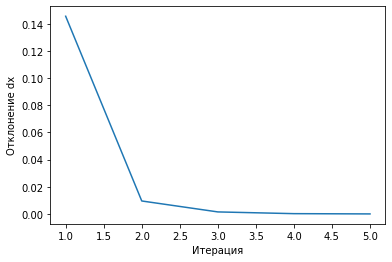

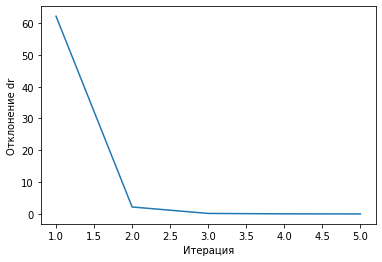

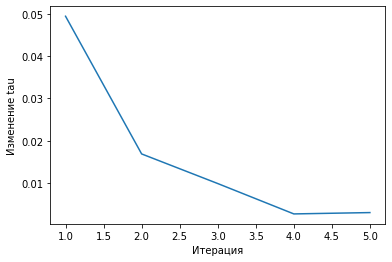

In [18]:
#Вариации с рандомными матрицами из начала домашки
#Тест 1
dx = []
dr = []
dtau = []
j = []
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)
print(minresidual(A, b, x_n1))

[-0.01219861  0.06140803  0.03411542  0.04786029  0.04407276  0.00757656
  0.02556055  0.02403275  0.031361    0.0790828 ]


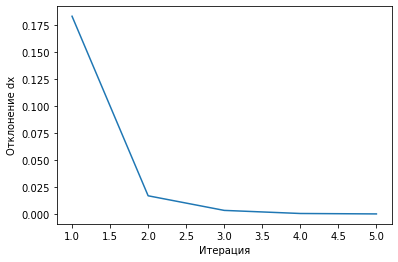

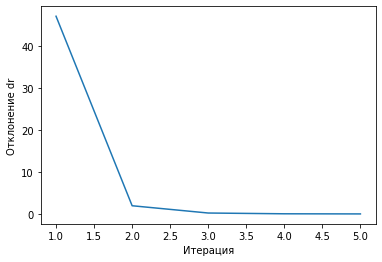

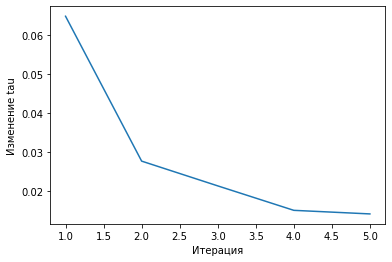

In [19]:
#Тест 2
dx = []
dr = []
dtau = []
j = []
n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
print(minresidual(A, b, x_n1))

[ 0.25499479 -0.03669982  0.33956206  0.03176873 -0.36034304  0.24822298
 -0.00476899  0.07337314  0.16127441  0.32159337]


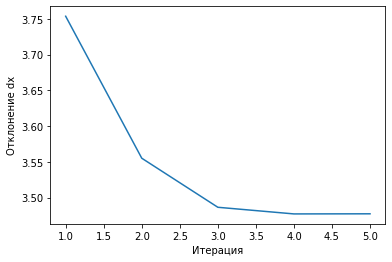

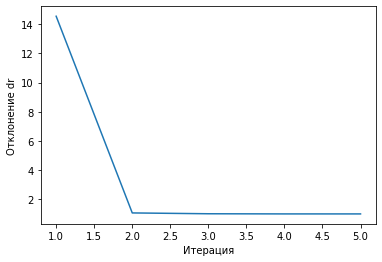

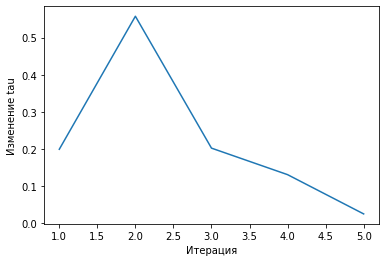

In [20]:
#Тест 3
dx = []
dr = []
dtau = []
j = []
n = 10
A = rndm.uniform(size=(n, n))
b = rndm.uniform(size=n)
print(minresidual(A, b, x_n1))
